In [121]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score


In [79]:
#Load the data set
bank = pd.read_csv("/content/bank-full (2).csv",sep=';')
bank.head(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


EDA

In [80]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [81]:
bank.shape

(45211, 17)

In [82]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
bank['y'] = le.fit_transform(bank['y'])

In [110]:
# One-Hot Encoding of categrical variables
bank=pd.get_dummies(bank,columns=['job','marital','education','contact','poutcome'])
bank

,age,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,y,Prediction,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,contact_cellular,contact_telephone,contact_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,58,no,2143,yes,no,5,may,261,1,-1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1
1,44,no,29,yes,no,5,may,151,1,-1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1
2,33,no,2,yes,yes,5,may,76,1,-1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1
3,47,no,1506,yes,no,5,may,92,1,-1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1
4,33,no,1,no,no,5,may,198,1,-1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,no,825,no,no,17,nov,977,3,-1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1
45207,71,no,1729,no,no,17,nov,456,2,-1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1
45208,72,no,5715,no,no,17,nov,1127,5,184,3,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0
45209,57,no,668,no,no,17,nov,508,4,-1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1


In [111]:
# Dividing our data into input and output variables 
X=bank.iloc[:,[0,5,9,11,12,13,14]]
Y=bank.iloc[:,-1]
LR=LogisticRegression()
LR.fit(X,Y)


LogisticRegression()

In [112]:
pred=LR.predict_proba(X)

In [113]:
pred_df=pd.DataFrame({'actual':Y,
                      'predicted_prob':LR.predict(X)})

In [114]:
pred_df

,actual,predicted_prob
0,1,1
1,1,1
2,1,1
3,1,1
4,1,1
...,...,...
45206,1,1
45207,1,1
45208,0,0
45209,1,1


In [115]:
YY=LR.predict(X)
YY

array([1, 1, 1, ..., 0, 1, 0], dtype=uint8)

In [116]:
bank['Prediction']=YY
bank

,age,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,y,Prediction,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,contact_cellular,contact_telephone,contact_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,58,no,2143,yes,no,5,may,261,1,-1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1
1,44,no,29,yes,no,5,may,151,1,-1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1
2,33,no,2,yes,yes,5,may,76,1,-1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1
3,47,no,1506,yes,no,5,may,92,1,-1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1
4,33,no,1,no,no,5,may,198,1,-1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,no,825,no,no,17,nov,977,3,-1,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1
45207,71,no,1729,no,no,17,nov,456,2,-1,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1
45208,72,no,5715,no,no,17,nov,1127,5,184,3,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0
45209,57,no,668,no,no,17,nov,508,4,-1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1


In [123]:
CMX=confusion_matrix(Y,YY)
CMX

array([[ 8089,   163],
       [    5, 36954]])

In [125]:
accuracy=((36954+8089)/(36954+8089+5+163))*100
accuracy

99.62840901550508

In [119]:
#Classification report
from sklearn.metrics import classification_report
print(classification_report(Y,YY))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99      8252
           1       1.00      1.00      1.00     36959

    accuracy                           1.00     45211
   macro avg       1.00      0.99      0.99     45211
weighted avg       1.00      1.00      1.00     45211



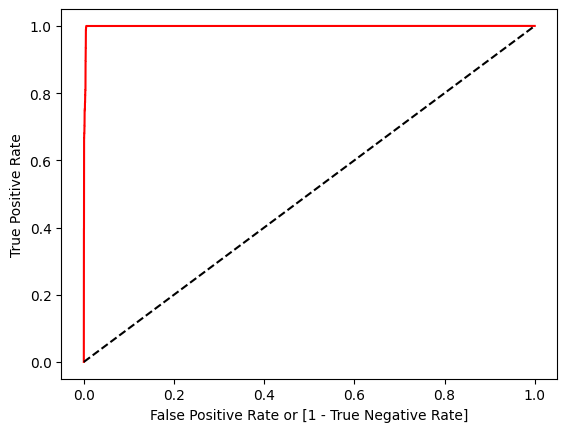

auc accuracy: 0.9900559638756534


In [120]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

fpr, tpr, thresholds = roc_curve(Y, LR.predict_proba (X)[:,1])

auc = roc_auc_score(Y, YY)

import matplotlib.pyplot as plt
plt.plot(fpr, tpr, color='red', label='logit model ( area  = %0.2f)'%auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')
plt.show()
print('auc accuracy:',auc)

In [122]:
auc

0.9900559638756534

BY Using Train_ Test _Split

In [95]:
array=bank.values

In [96]:
X=array[:,[0,5,9,11,12,13,14]]
Y=array[:,-1]
Y=Y.astype('int')

In [97]:
Y

array([0, 0, 0, ..., 0, 0, 0])

In [98]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.20,shuffle=True)

In [ ]:
model=LogisticRegression()
model.fit(X_train,Y_train)

In [100]:
op_train=model.score(X_train,Y_train)
op_train

0.9986452112364521

In [101]:
op_test=model.score(X_test,Y_test)
op_test

0.9992259206015702

In [102]:
pred=model.predict_proba(X_test)

In [103]:
pred

array([[9.99985178e-01, 1.48224700e-05],
       [1.00000000e+00, 2.06602451e-33],
       [9.99999999e-01, 1.26352406e-09],
       ...,
       [1.00000000e+00, 7.93289077e-24],
       [1.00000000e+00, 1.03903423e-18],
       [1.00000000e+00, 1.19925944e-19]])

In [104]:
preds=model.predict(X_test)

In [105]:
CMX=confusion_matrix(Y_test,preds)
CMX

array([[8755,    4],
       [   3,  281]])

In [126]:
accuracy=((8755+281)/(8755+281+4+3))*100
accuracy

99.92259206015703

In [107]:
print(classification_report(Y_test,preds))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      8759
           1       0.99      0.99      0.99       284

    accuracy                           1.00      9043
   macro avg       0.99      0.99      0.99      9043
weighted avg       1.00      1.00      1.00      9043



Text(0, 0.5, 'True Positive Rate')

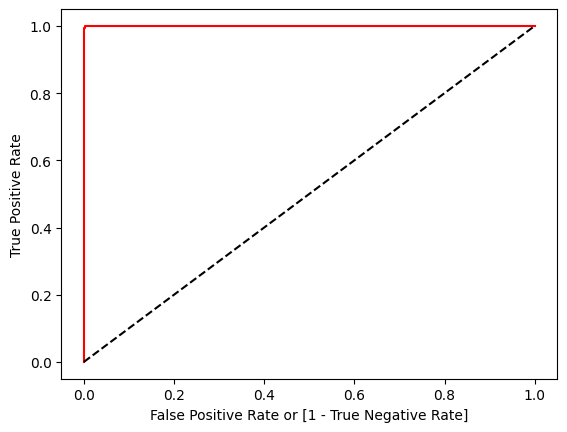

In [108]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

fpr, tpr, thresholds = roc_curve(Y, model.predict_proba (X)[:,1])

auc = roc_auc_score(Y_test,preds)

import matplotlib.pyplot as plt
plt.plot(fpr, tpr, color='red', label='logit model ( area  = %0.2f)'%auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')

In [109]:
auc

0.9944899732910536